Visit original tutorial page: https://morvanzhou.github.io/tutorials/

Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:

- torch: 0.4
- matplotlib
- numpy

In [34]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1) # reproducible

<IPython.core.display.Javascript object>


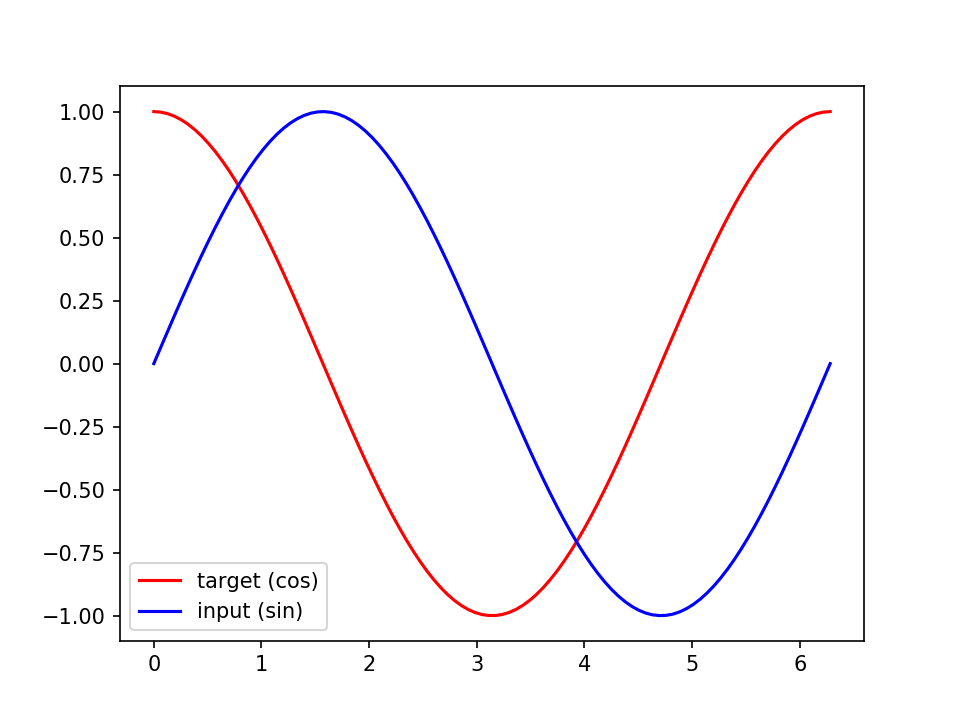

In [35]:
# Hyper parameters
TIME_STEP = 10  # RNN time step
INPUT_SIZE = 1  # RNN  input size
LR = 0.02       # RNN  learning rate

#show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32) # float32 for converting torch FloatTensor
x_np = np.sin(steps)
y_np = np.cos(steps)

h1 = plt.plot(steps, y_np, 'r-', label='target (cos)')
h2 = plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


<IPython.core.display.Javascript object>


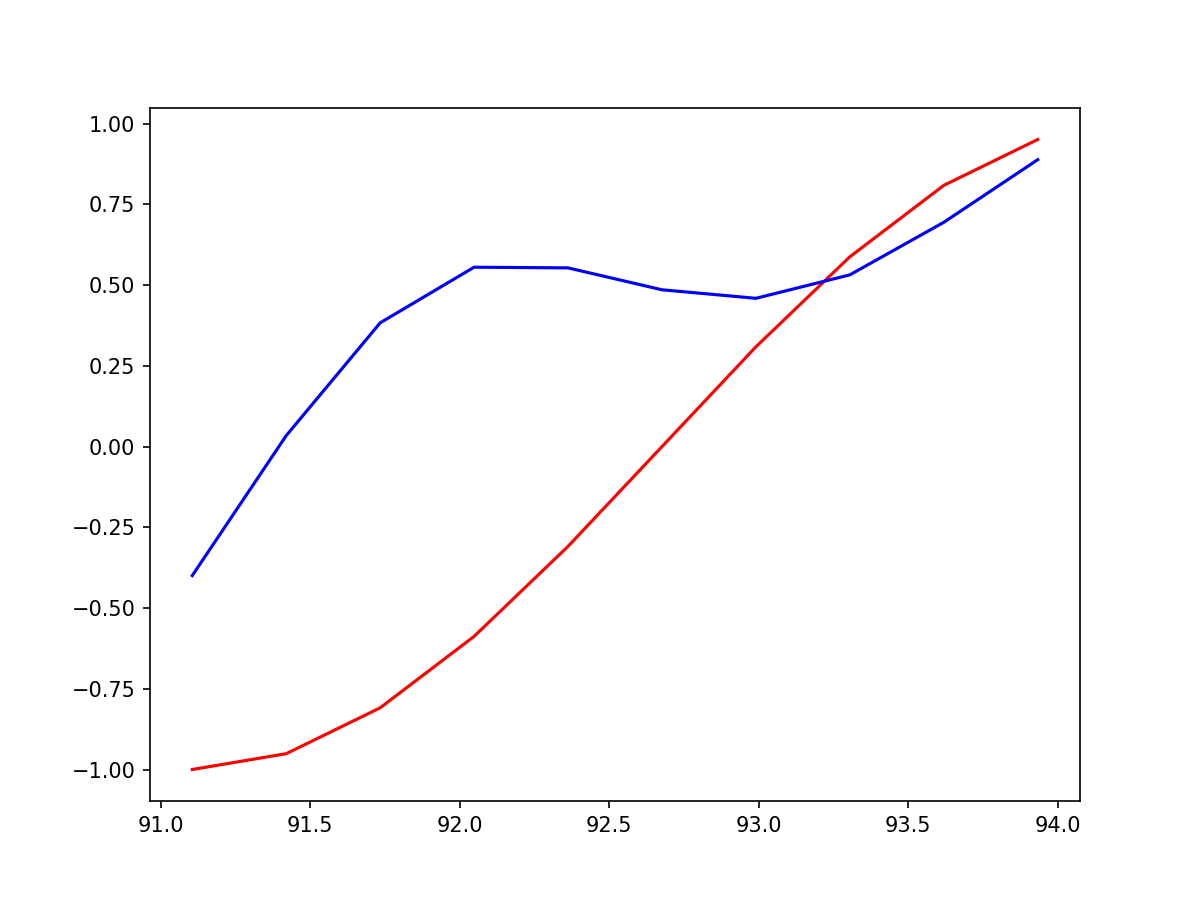

In [41]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,          # RNN hiden unit 
            num_layers=1,            # number of RNN layer
            batch_first=True,        # input & output will has batch size as 1s dimension,
                                     #   e.g., (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h_state):
        # x (batch, time_step, input_size, i.e., (batch, 10,1) ) 
        # h_state (n_layers, batch, hidden_size, i.e., (1, batch, 32) )
        # r_out (batch, time_step, hidden_size, i.e., (batch, 10, 32) )
        r_out, h_state = self.rnn(x, h_state)
        
        outs = [] # save all predictions
        for time_step in range(r_out.size(1)):  # calculate output for each time step
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs, dim=1), h_state
    
        # instead, for simplicity, you can replace above codes by follows
        # r_out = r_out.view(-1, 32)
        # outs = self.out(r_out)
        # outs = outs.view(-1, TIME_STEP, 1)
        # return outs, h_state
        
        # or even simpler, since nn.Linear can accept inputs of any dimension
        #  and returns outputs with same dimension except for the last
        # outs = self.out(r_out)
        # return outs
        
rnn = RNN()
print(rnn) # architecture

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)    # optimize all cnn parameters
loss_func = nn.MSELoss()

h_state = None   # for initial hidden state

# fig = plt.figure(1, figsize=(8,6))
fig, ax=plt.subplots(1,1,figsize=(8,6))
plt.ion()     # continuously plot

fig.show()
fig.canvas.draw()
for step in range(30):
    start, end = step * np.pi,(step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32, endpoint=False) # float32 for converting to torch FloatTensor
    x_np=np.sin(steps)
    y_np=np.cos(steps)
    
    x=torch.from_numpy(x_np[np.newaxis, :, np.newaxis]) # shape (batch, time_step, input_size)
    y=torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    
    prediction, h_state = rnn(x, h_state) # RNN output
    # !! next step is important!!
    h_state=h_state.data    # repack the hidden state, break the connection from last iteration
    
    loss=loss_func(prediction, y) # calculate loss
    optimizer.zero_grad()         # clear gradients for this training step
    loss.backward()               # backpropagation, compute gradients
    optimizer.step()              # apply gradients
    
    # plotting
    ax.clear()
    ax.plot(steps, y_np.flatten(), 'r-')
    ax.plot(steps, prediction.data.numpy().flatten(), 'b-')
    fig.canvas.draw()
    plt.pause(0.05)
    print('Step %6.0i ' % step, '| loss %2.4f' % loss.data.numpy(), end='\r')
    
# plt.ioff()

<IPython.core.display.Javascript object>


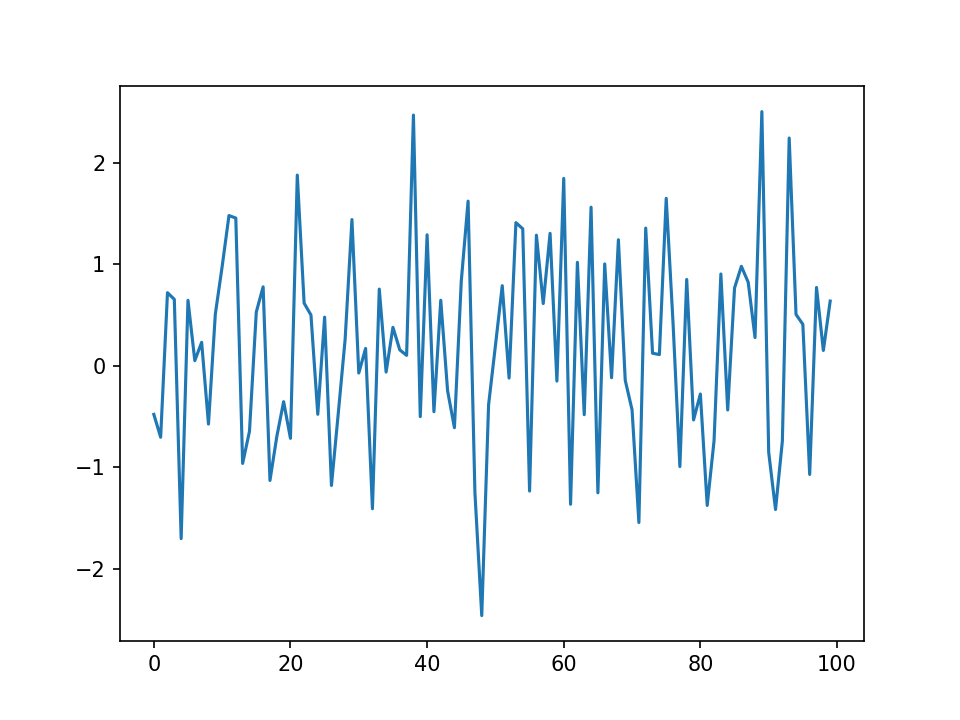

In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()
plt.ioff()